In [52]:
import pandas as pd
import numpy as np
import sklearn.feature_selection as fs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
hcc_smarts_df = pd.read_csv("cleaned_data/hcc_smarts_df.csv")
mcf_smarts_df = pd.read_csv("cleaned_data/mcf_smarts_df.csv")

In [45]:
# Instantiate VarianceThreshold object
threshold = 0.05
selector = fs.VarianceThreshold(threshold)

# Fit selector to DataFrame
selector.fit(hcc_smarts_df)

# Get boolean mask of features that meet threshold
mask = selector.get_support()

# Get list of column names that meet threshold
near_zero_var_cols = hcc_smarts_df.columns[~mask].tolist()

# Print the result
print(f'Columns with < {threshold} variance: {near_zero_var_cols}')
print(f"In total: {len(near_zero_var_cols)}")

Columns with < 0.05 variance: ['CICP3', 'MIR6726', 'NDUFB4P8', 'MMP23A', 'RPL7P11', 'RPL23AP19', 'MZT1P1', 'LINC01647', 'DRAXIN', 'SBF1P2', 'HNRNPCL3', 'BRWD1P1', 'CELA2B', 'CLCNKA', 'RNU6-1099P', 'HSPE1P27', 'PPP1R11P1', 'NBPF2P', 'PFN1P10', 'CDC42-IT1', 'BTBD6P1', 'MIR6731', 'LIN28A', 'RPL12P13', 'OSTCP2', 'RPEP3', 'SNORA16A', 'CSMD2-AS1', 'EFCAB14P1', 'MKRN8P', 'HMGB1P48', 'NENFP1', 'ZNF859P', 'FCF1P6', 'GAPDHP51', 'ANAPC10P1', 'NDUFS5P3', 'HNRNPA3P12', 'GYG1P3', 'LINC01748', 'SLC2A3P2', 'MIR3671', 'MRPS21P1', 'DNAJB6P4', 'HNRNPCP9', 'TXNP2', 'CASP3P1', 'MSH4', 'NSRP1P1', 'HNRNPA1P64', 'HNRNPA3P14', 'ST13P20', 'LINC01361', 'PKN2-AS1', 'GBP1P1', 'GAPDHP46', 'ACTBP12', 'ALG14-AS1', 'UBE2WP1', 'FTLP17', 'NBPF6', 'RANP5', 'GSTM1', 'HIGD1AP12', 'AKR7A2P1', 'PTPN22', 'EIF2S2P5', 'RNY1P13', 'CNOT7P2', 'HNRNPA1P43', 'NEFHP1', 'VTCN1', 'VPS25P1', 'PSMC1P12', 'GAPDHP74', 'PPIAL4A', 'LINC01691', 'PFN1P12', 'H2BP2', 'PFN1P3', 'MIR6736', 'ITGA10', 'NUDT4P2', 'RNVU1-29', 'PFN1P8', 'PFN1P4', 'H4C1

In [50]:
X = hcc_smarts_df.loc[:,hcc_smarts_df.columns!='Target']

pca = PCA(n_components=3)
pca.fit(X)
print(sum(pca.explained_variance_ratio_))
red_X = pd.DataFrame(pca.transform(X))
red_X

0.6855459990277898


,0,1,2
0,8508.270605,6572.537967,-8512.093421
1,66982.603007,-34314.857608,5568.678773
2,-56024.066102,7548.420538,-1331.213115
3,53124.646444,-43416.520855,-24601.674738
4,-35092.642336,10995.858970,-4501.117450
...,...,...,...
238,-5888.008981,-14855.205800,-5406.529526
239,-43546.788526,776.482459,-5081.064903
240,19297.458265,-11357.508230,-9332.341187
241,-40565.304391,2338.173224,-3916.955433


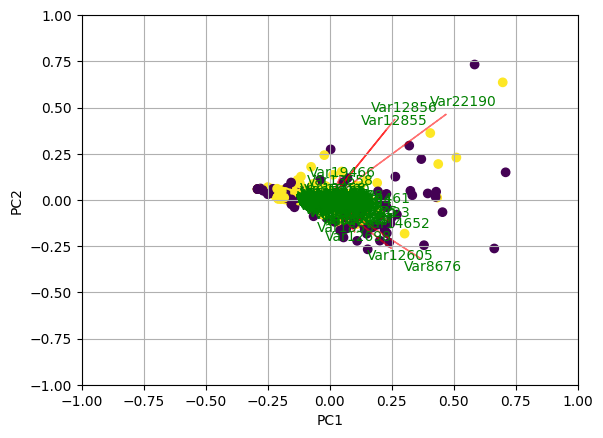

In [49]:
#PCA visualisation with 2 components (60% explained variance)
x_new = pca.transform(X)
y = hcc_smarts_df["Target"]
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

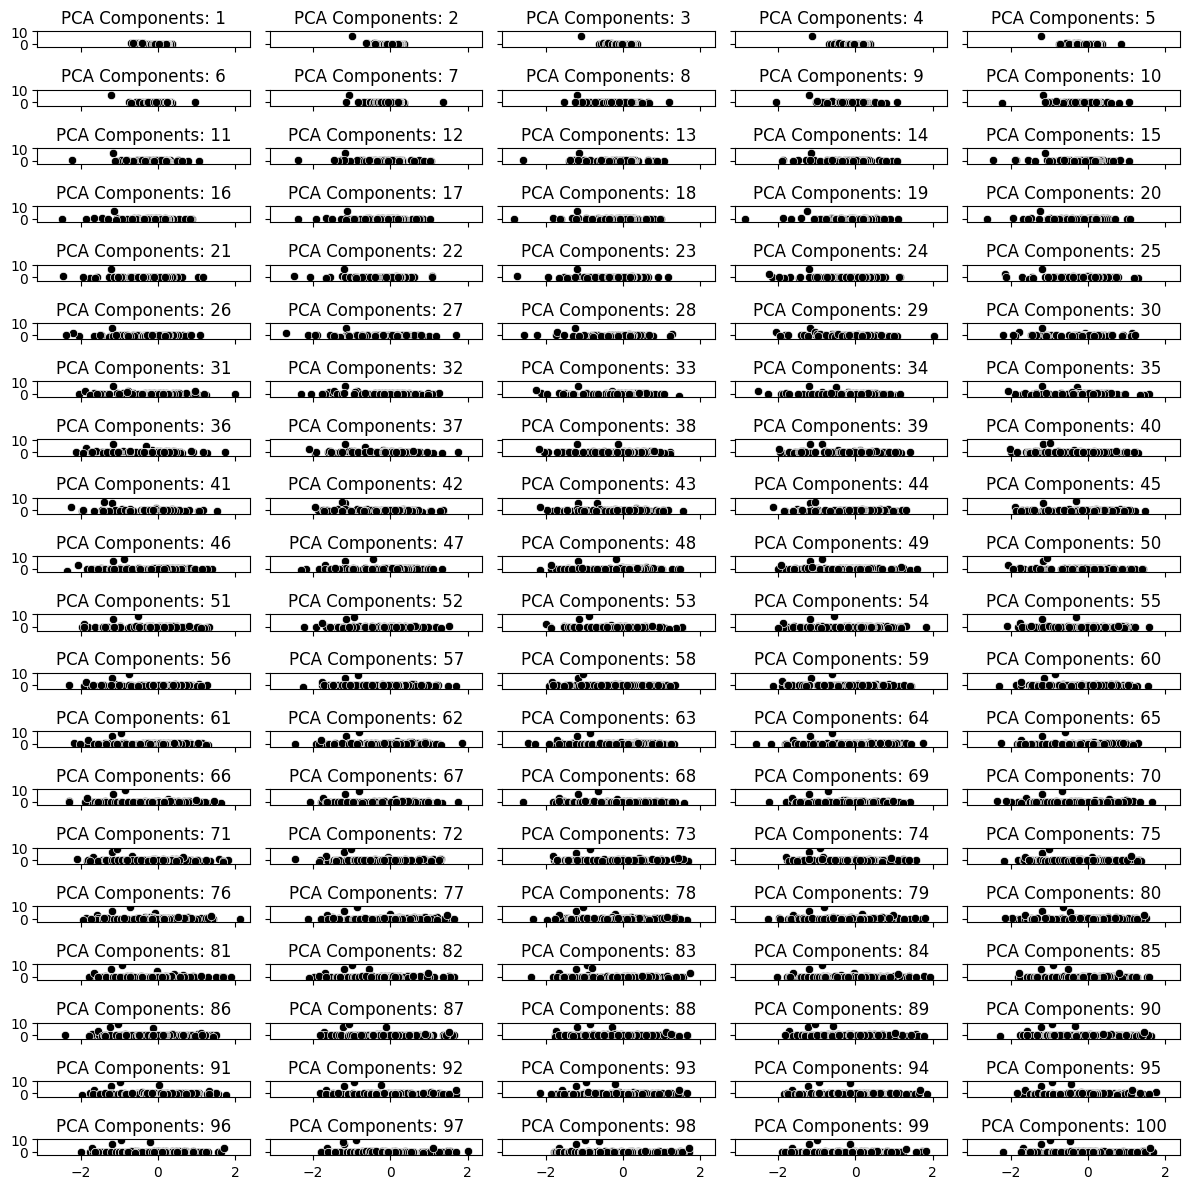

In [64]:
#cool plotting of PCA
X = hcc_smarts_df.loc[:,hcc_smarts_df.columns!='Target']
def transform_pca(X, n):

    pca = PCA(n_components=n)
    pca.fit(X)
    X_new = pca.inverse_transform(pca.transform(X))

    return X_new

rows = 20
cols = 5
comps = 1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


fig, axes = plt.subplots(rows, 
                         cols, 
                         figsize=(12,12), 
                         sharex=True, 
                         sharey=True)


for row in range(rows):
    for col in range(cols):
        try:
            X_new = transform_pca(X_scaled, comps)
            ax = sns.scatterplot(x=X_new[:, 0], 
                                 y=X_new[:, 1], 
                                 ax=axes[row, col], 
                                 color='black')
            ax.set_title(f'PCA Components: {comps}');

            comps += 1
        except:
            pass
plt.tight_layout() 
plt.savefig('pcavisualize_2.png', dpi=300)